# Team 24 - Question 1

## Import statements 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.svm import SVC
import seaborn as sns

## Function definitions

In [2]:
def mean_squared_error1(Y_true, Y_pred):
# Takes input as two numpy arrays and returns the mean squared error
# Inputs:
#     Y_true -----> True class labels
#     Y_pred -----> Predicted class labels
# Returns:
#     error -------> Mean Squared error

    error = np.sum((Y_true - Y_pred)**2)/len(Y_true)
    
    try:
        return(error[0])
    except:
        return(error)

In [3]:
def accuracy(Y_true, Y_pred):
    
# Returns the accuracy of predicted classes
# Inputs:
#     Y_true -----> True class labels
#     Y_pred -----> Predicted class labels
# Returns:
#     tp/N -------> Accuracy of predicted class labels 

    tp = len(np.argwhere(Y_true==Y_pred))
    N  = Y_true.shape[0]
    return tp/N

In [4]:
def decision_region(x_train, y_train, svc_clf):
    
# Plots the decision region
# Inputs:
#     x_train ---------> Training Datapoints
#     y_train ---------> Class labels for x_train
#     svc_clf --------->

# Returns:
#     None  

    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    h = .2  
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    x = np.c_[xx.ravel(), yy.ravel()]
    y_pred = svc_clf.predict(x)
    support_vectors = svc_clf.support_vectors_
    y_pred = np.array(y_pred).reshape(xx.shape)
    classes = np.unique(y_train).astype(str)
    
#     plt.style.use('classic')
    plt.figure(figsize=[10,10])
    plt.pcolormesh(xx, yy, y_pred, cmap=plt.cm.Paired)
    scatter = plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
    scatter_sv = plt.scatter(support_vectors[:,0], support_vectors[:,1], c='g', edgecolors='k')
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
#     plt.title("Decision Boundary: ")
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.legend(handles=scatter.legend_elements()[0] + [scatter_sv], labels=list(map(lambda x: 'Class {}'.format(x), classes))+['Support vectors'])
    plt.show()

## Loading the Dataset and Exploring

In [5]:
import os
os.getcwd()
os.chdir('/home/achusanjeev/PRML_Data_Contest/PA2_Datasets')

In [6]:
df = pd.read_csv('Regression_dataset.csv')

In [7]:
df.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,Y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
df.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,Y
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df.isna().sum()

X_1     0
X_2     0
X_3     0
X_4     0
X_5     0
X_6     0
X_7     0
X_8     0
X_9     0
X_10    0
X_11    0
X_12    0
X_13    0
Y       0
dtype: int64

In [10]:
X = df.drop('Y',axis=1)
y = df.loc[:,'Y']

In [11]:
# Performing train and test split in the ratio 80:20

np.random.seed(10)
N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X.loc[order[:train_N],:]
y_train = y.loc[order[:train_N]]

X_test = X.loc[order[train_N:],:]
y_test = y.loc[order[train_N:]]

## Kernel Ridge Regression 

In [12]:
def Ridge_regression(X,y, Lambda):
# Performs Ridge Regression

# Inputs:
#     X -----> Feature Matrix
#     y -----> Class Labels
# Returns:
#     B -------> Coefficients of Ridge Regression 
    X = np.matrix(X)
    y = np.matrix(y)
    
    I = np.identity(X.shape[1])
    
    # Let B be the matrix with parameters of regression ie B.X = y

    B = np.linalg.inv(X.T*X+ Lambda* I)*(X.T*y.T)
    
    return(B)

### Linear Kernel

In [13]:
# Tuning to find best Lambda

MSE_list = []
Lambda_list = [0.01,0.1,0,1,10,100]
for Lambda in Lambda_list:
    B = Ridge_regression(X_train, y_train, Lambda)
    y_test_pred = np.matrix(X_test)*B
    y_test_pred = np.array(y_test_pred.T)[0] # Fixing the shape of y_test_pred to match that of y
    y_test = np.array(y_test)
    
    MSE_list.append(mean_squared_error1(y_test,y_test_pred))

In [14]:
Lambda_best = Lambda_list[(np.argmin(MSE_list))]
print(Lambda_best)

100


In [15]:
# Training on Train dataset

X = df.drop('Y',axis=1)
y = df.loc[:,'Y']

# Train Test Split

# Shuffle here

X_train = X[:int(X.shape[0]*0.8)]
y_train = y[:int(X.shape[0]*0.8)]
X_test = X[int(X.shape[0]*0.8):]
y_test = y[int(X.shape[0]*0.8):]

B = Ridge_regression(X_train, y_train, Lambda_best)

y_train_pred = np.matrix(X_train)*B
y_train_pred = np.array(y_train_pred.T)[0] # Fixing the shape of y_test_pred
y_train = np.array(y_train) # Converting to array format

y_test_pred = np.matrix(X_test)*B
y_test_pred = np.array(y_test_pred.T)[0] # Fixing the shape of y_test_pred
y_test = np.array(y_test) # Converting to array format

mse_train1 = mean_squared_error1(y_train,y_train_pred)
mse_test1 = mean_squared_error1(y_test,y_test_pred)
print('Train Mean Squared Error = {}'.format(mse_train1))
print('Test Mean Squared Error = {}'.format(mse_test1))

Train Mean Squared Error = 26.41172959823605
Test Mean Squared Error = 40.10677625766792


### Polynomial Kernel (Degree = 2)

In [16]:
X = df.drop('Y',axis=1)
y = df.loc[:,'Y']

In [17]:
X.columns

Index(['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10',
       'X_11', 'X_12', 'X_13'],
      dtype='object')

In [18]:
# Generating the polynomial features (Degree =2)
X_poly = X.copy()

count = 14
for i in list(X.columns):
    for j in list(X.columns):
        if i == j:
            X_poly['X_{}'.format(count)] = X[i]*X[j]
        else:
            X_poly['X_{}'.format(count)] = np.sqrt(2) * X[i]*X[j]
        count = count + 1

In [19]:
X_poly.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_173,X_174,X_175,X_176,X_177,X_178,X_179,X_180,X_181,X_182
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,...,0.0,3.789018,46.306302,459.189487,28.804985,7.042784,2084.663928,107.754588,2795.280787,24.8004
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,...,0.0,6.062253,82.997281,1019.854454,64.204297,25.851824,3128.070694,230.081233,5130.294457,83.5396
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,...,0.0,2.672963,40.949332,348.226048,28.308897,11.398561,1379.225919,101.447196,2238.848420,16.2409
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,...,0.0,1.904267,29.096200,190.426685,25.205342,12.473364,923.028908,77.750633,1640.787828,8.6436
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,...,0.0,3.452293,53.872358,408.546499,45.695398,22.613275,1673.382340,140.956080,2991.736264,28.4089


In [20]:
# Performing train and test split in the ratio 80:20

np.random.seed(10)
N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X.loc[order[:train_N],:]
y_train = y.loc[order[:train_N]]

X_test = X.loc[order[train_N:],:]
y_test = y.loc[order[train_N:]]

In [21]:
# Tuning to find best Lambda

MSE_list = []
Lambda_list = [0.01,0.1,0,1,10,100]
for Lambda in Lambda_list:
    B = Ridge_regression(X_train, y_train, Lambda)
    y_test_pred = np.matrix(X_test)*B
    y_test_pred = np.array(y_test_pred.T)[0] # Fixing the shape of y_test_pred
    y_test = np.array(y_test)
    
    MSE_list.append(mean_squared_error1(y_test,y_test_pred))

In [22]:
Lambda_best = Lambda_list[(np.argmin(MSE_list))]
print(Lambda_best)

100


In [23]:
# Training on Train dataset

# Train Test Split

# Shuffle here

X_train = X_poly[:int(X.shape[0]*0.8)]
y_train = y[:int(X.shape[0]*0.8)]
X_test = X_poly[int(X.shape[0]*0.8):]
y_test = y[int(X.shape[0]*0.8):]

B = Ridge_regression(X_train, y_train, Lambda_best)

y_train_pred = np.matrix(X_train)*B
y_train_pred = np.array(y_train_pred.T)[0] # Fixing the shape of y_test_pred
y_train = np.array(y_train) # Converting to array format

y_test_pred = np.matrix(X_test)*B
y_test_pred = np.array(y_test_pred.T)[0] # Fixing the shape of y_test_pred
y_test = np.array(y_test) # Converting to array format

mse_train2 = mean_squared_error1(y_train,y_train_pred)
mse_test2 = mean_squared_error1(y_test,y_test_pred)
print('Train Mean Squared Error = {}'.format(mse_train2))
print('Test Mean Squared Error = {}'.format(mse_test2))

Train Mean Squared Error = 6.385692655038329
Test Mean Squared Error = 612.6506094686364


### Constructing Table of Errors

In [24]:
Table = tabulate([['Linear',mse_train1, mse_test1],
['Polynomial',mse_train2, mse_test2]],
                 headers=['Kernel','Train Error','Test Error'], tablefmt = 'fancy_grid')

In [25]:
print(Table)

╒════════════╤═══════════════╤══════════════╕
│ Kernel     │   Train Error │   Test Error │
╞════════════╪═══════════════╪══════════════╡
│ Linear     │      26.4117  │      40.1068 │
├────────────┼───────────────┼──────────────┤
│ Polynomial │       6.38569 │     612.651  │
╘════════════╧═══════════════╧══════════════╛


#### Linear Kernel is much more efficient since it leads to enormous overfitting in the case of polynomial kernel

## Kernel Logistic Regression and Kernel SVM

### Loading and Visualizing the values

In [26]:
df2 = pd.read_csv('/home/achusanjeev/PRML_Data_Contest/PA2_Datasets/Dataset_3/Dataset_3_Team_23.csv')

In [27]:
df2.head()

,# x_1,x_2,Class_label
0,0.302069,-0.547271,1
1,-0.797395,-0.724008,0
2,-0.932978,0.135196,0
3,0.639708,-0.261620,1
4,0.195793,1.072244,0


In [28]:
df2.columns = ['X1','X2','y']
X = df2[['X1','X2']]
y = df2['y']

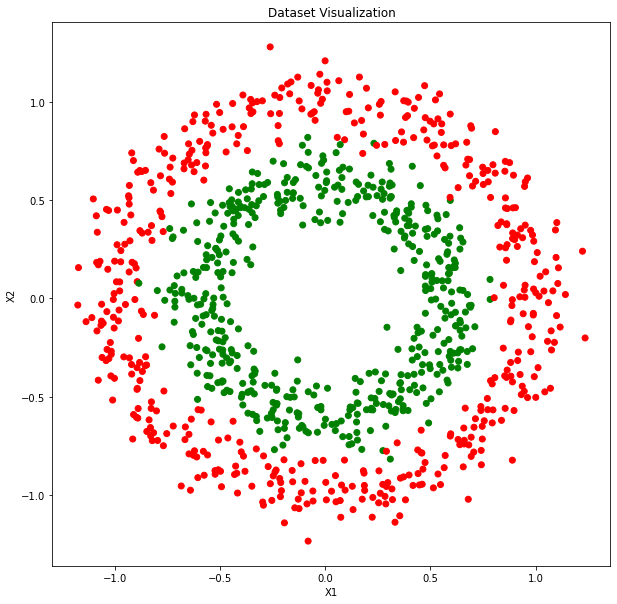

In [29]:
cdict = {0: 'red', 1: 'green'}

plt.figure(figsize=[10,10])
plt.scatter(X['X1'],X['X2'], c = y.apply(lambda x: cdict[x]))
plt.title("Dataset Visualization")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### Logistic Regression (Function Definitions)

In [30]:
# Performing gradient descent for logistic regression

In [31]:
def sigmoid(z):
    
# Returns the sigmoid of input value
# Inputs:
#     z -----> Input value
# Returns:
#     Sigmoid of the input value
    return 1 / (1 + np.exp(-z))


In [32]:
def predict(X, w):
    
# Returns the prediction of the label
#     X -----> Feature Vector
#     w -----> Weights Vector

# Returns:
#     Prediction of label
    z = X * w
    return sigmoid(z)

# correct

In [33]:
def cost_function(X, y, w):

# Returns the Cost Function
# Inputs:
#     X -----> Feature Vector
#     w -----> Weights Vector
#     y -----> Class labels

# Returns:
#     Cost -----> Cost function value

    y_pred = predict(X, w) 
    cost = np.mean(-y.T * np.log(y_pred) - (1-y).T*np.log(1-y_pred))

    return cost

In [34]:
def update_weights(X, y, w, alpha):
    
# Updates the weights using the gradient descent approach
# Inputs:
#     X -----> Feature Vector
#     w -----> Weights Vector
#     y -----> Class labels
#     alpha -----> Learning Rate

# Returns:
#     w -----> Updated weights
    
    n = len(y)
    y_pred = predict(X, w)
    gradient = X.T*(y_pred - y)
    w = w - gradient * alpha/n

    return w

In [35]:
# Training
def logistic_regression(X, y, w, alpha, iters):
    
# Performs logistic regression and outputs weights and cost functions

# Inputs:
#     X -----> Feature Vector
#     w -----> Weights Vector
#     y -----> Class labels
#     alpha -----> Learning Rate
#     iters -----> Number of times to update weights

# Returns:
#     w -----> Updated weights
#     costs ----> Previous costs
    
    costs = []

    for i in range(iters):
        w = update_weights(X, y, w, alpha)

        cost = cost_function(X, y, w)
        costs.append(cost)

        # Log Progress
        if (i % 500 == 0):
            print("For iteration {}, cost is {}".format(i,cost))

    return w, costs

### Logistic Regression (Linear Kernel)

In [36]:
# Creating an extra columns with all ones for logistic regression

X_log = pd.DataFrame(np.ones(X.shape[0]))
X_log['X_1'] = X['X1'].copy()
X_log['X_2'] = X['X2'].copy()
X_log.columns = ['X0','X1','X2']

In [37]:
X_log.head()

,X0,X1,X2
0,1.0,0.302069,-0.547271
1,1.0,-0.797395,-0.724008
2,1.0,-0.932978,0.135196
3,1.0,0.639708,-0.261620
4,1.0,0.195793,1.072244


In [38]:
# Performing train and test split in the ratio 80:20

np.random.seed(10)
N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X_log.loc[order[:train_N],:]
y_train = y.loc[order[:train_N]]

X_test = X_log.loc[order[train_N:],:]
y_test = y.loc[order[train_N:]]

In [39]:
# Converting the dataframes to matrices for the purpose of the model
X_log_matrix = np.matrix(X_train)
y_log_matrix = np.matrix(y_train).T

In [40]:
# Running the gradient descent model

w, costs = logistic_regression(X_log_matrix, y_log_matrix, w = np.matrix([[2], [2], [2]]), alpha = 0.1, iters = 10000)

For iteration 0, cost is 1010.5193001772918
For iteration 500, cost is 554.406083795217
For iteration 1000, cost is 554.3217805098246
For iteration 1500, cost is 554.3217669605674
For iteration 2000, cost is 554.3217669583928
For iteration 2500, cost is 554.3217669583925
For iteration 3000, cost is 554.3217669583925
For iteration 3500, cost is 554.3217669583925
For iteration 4000, cost is 554.3217669583925
For iteration 4500, cost is 554.3217669583925
For iteration 5000, cost is 554.3217669583925
For iteration 5500, cost is 554.3217669583925
For iteration 6000, cost is 554.3217669583925
For iteration 6500, cost is 554.3217669583925
For iteration 7000, cost is 554.3217669583925
For iteration 7500, cost is 554.3217669583925
For iteration 8000, cost is 554.3217669583925
For iteration 8500, cost is 554.3217669583925
For iteration 9000, cost is 554.3217669583925
For iteration 9500, cost is 554.3217669583925


In [41]:
print('The feature matrix is \n{}'.format(w))

The feature matrix is 
[[-0.0193001 ]
 [ 0.04842247]
 [ 0.04620881]]


In [42]:
#Getting train and test accuracy

y_pred_train = 1*(sigmoid(X_log_matrix*w)>0.5)
accuracy_train1 = accuracy(y_train,np.array(y_pred_train.T)[0])

X_log_test = np.matrix(X_test)
y_pred_test = 1*(sigmoid(X_log_test*w)>0.5)
accuracy_test1 = accuracy(y_test,np.array(y_pred_test.T)[0])

print('Train accuracy for linear kernel logistic regression is {}'.format(accuracy_train1))
print('Test accuracy for linear kernel logistic regression is {}'.format(accuracy_test1))

Train accuracy for linear kernel logistic regression is 0.46875
Test accuracy for linear kernel logistic regression is 0.43


/home/achusanjeev/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


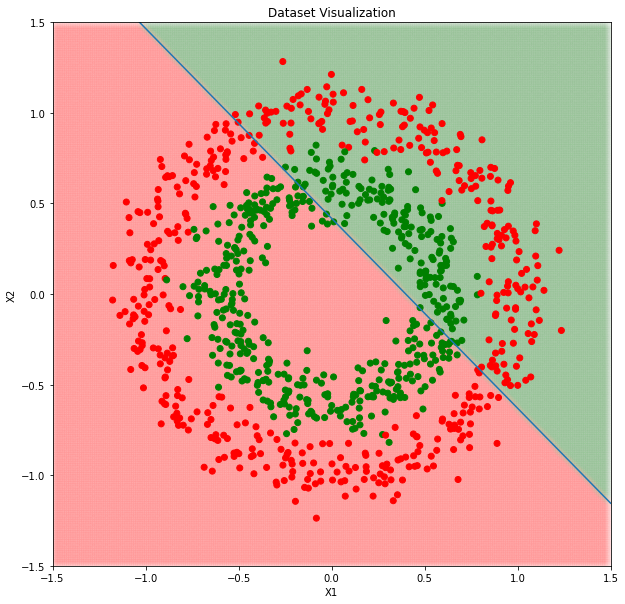

In [43]:
#Plotting Decision Boundary for the whole data

xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))

x_plot = np.c_[xx.ravel(), yy.ravel()]
y_plot = pd.Series(np.array(1*(sigmoid(w[0]+ x_plot*w[1:])>0.5).T)[0])

# Plotting decision boundary

plt.figure(figsize=[10,10])

cdict = {0: 'red', 1: 'green'}


plt.scatter(x_plot[:,0], x_plot[:,1], c = y_plot.apply(lambda x: cdict[x]), s =100, alpha=0.01)
plt.title("Dataset Visualization")
plt.xlim(left=-1.5, right =1.5)
plt.ylim(bottom=-1.5, top =1.5)
plt.xlabel('X1')
plt.ylabel('X2')



# Plotting decision boundary

x_plot = np.linspace(-1.5,1.5,1000)
y_plot = np.array((-w[0]- w[1]*x_plot)/w[2]).T

cdict = {0: 'red', 1: 'green'}


plt.scatter(X['X1'],X['X2'], c = y.apply(lambda x: cdict[x]))
plt.title("Dataset Visualization")
plt.plot(x_plot, y_plot)
plt.xlim(right=1.5)
plt.xlabel('X1')
plt.ylabel('X2')


plt.show()

### Logistic Regression (Polynomial Kernel)

In [44]:
# Generating the polynomial features
X_poly = X.copy()

count = 3
for i in list(X.columns):
    for j in list(X.columns):
        if i == j:
            X_poly['X{}'.format(count)] = X[i]*X[j]
        else:
            X_poly['X{}'.format(count)] = np.sqrt(2) * X[i]*X[j]
        count = count + 1

In [45]:
# Creating an extra column with all ones for logistic regression
X_log = pd.DataFrame(np.ones(X.shape[0]))
X_log.columns = ['X0']

for i in range(1,7):
    X_log['X{}'.format(i)] = X_poly['X{}'.format(i)].copy()

In [46]:
X_log.head()

,X0,X1,X2,X3,X4,X5,X6
0,1.0,0.302069,-0.547271,0.091246,-0.233789,-0.233789,0.299506
1,1.0,-0.797395,-0.724008,0.635838,0.816454,0.816454,0.524188
2,1.0,-0.932978,0.135196,0.870447,-0.178382,-0.178382,0.018278
3,1.0,0.639708,-0.261620,0.409226,-0.236683,-0.236683,0.068445
4,1.0,0.195793,1.072244,0.038335,0.296897,0.296897,1.149707


In [47]:
# Train Test Split

# Shuffle here

# Performing train and test split in the ratio 80:20

np.random.seed(10)
N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X_log.loc[order[:train_N],:]
y_train = y.loc[order[:train_N]]

X_test = X_log.loc[order[train_N:],:]
y_test = y.loc[order[train_N:]]

In [48]:
# Converting into matrix form for logistic regression

X_log_matrix = np.matrix(X_train)
y_log_matrix = np.matrix(y_train).T

In [49]:
w, cost_history = logistic_regression(X_log_matrix, y_log_matrix, w = np.matrix([[0],[0],[0],[0],[0],[0],[0]]), alpha = 0.1, iters = 10000)

For iteration 0, cost is 553.4641367824374
For iteration 500, cost is 315.61927209164764
For iteration 1000, cost is 226.00205588004016
For iteration 1500, cost is 180.5275224039305
For iteration 2000, cost is 153.09098136858086
For iteration 2500, cost is 134.6680761807855
For iteration 3000, cost is 121.38623023697278
For iteration 3500, cost is 111.31758578517145
For iteration 4000, cost is 103.39539826977978
For iteration 4500, cost is 96.98118767017334
For iteration 5000, cost is 91.66899182756103
For iteration 5500, cost is 87.18802569017413
For iteration 6000, cost is 83.35051444331131
For iteration 6500, cost is 80.02199451761786
For iteration 7000, cost is 77.10354224632572
For iteration 7500, cost is 74.520686442259
For iteration 8000, cost is 72.21624107070062
For iteration 8500, cost is 70.14552829371877
For iteration 9000, cost is 68.27310895592817
For iteration 9500, cost is 66.57049202771614


In [50]:
print('The weights of the logistic regression are \n{}'.format(w))

The weights of the logistic regression are 
[[  7.57631317]
 [ -0.14152093]
 [  0.03720211]
 [-11.39309938]
 [ -0.09886402]
 [ -0.09886402]
 [-11.44353333]]


In [51]:
#Getting train and test accuracy

y_pred_train = 1*(sigmoid(X_log_matrix*w)>0.5)
accuracy_train2 = accuracy(y_train,np.array(y_pred_train.T)[0])

X_log_test = np.matrix(X_test)
y_pred_test = 1*(sigmoid(X_log_test*w)>0.5)
accuracy_test2 = accuracy(y_test,np.array(y_pred_test.T)[0])

print('Train accuracy for linear kernel logistic regression is {}'.format(accuracy_train1))
print('Test accuracy for linear kernel logistic regression is {}'.format(accuracy_test1))

Train accuracy for linear kernel logistic regression is 0.46875
Test accuracy for linear kernel logistic regression is 0.43


/home/achusanjeev/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


In [52]:
# Creating a meshgrid and converting it into polynomial kernel so as to predict its class (DECISION BOUNDARY)
xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
x_plot = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
x_plot.columns = ['X_1','X_2']
x_poly_plot = x_plot.copy()

count = 3
for i in list(x_plot.columns):
    for j in list(x_plot.columns):
        if i == j:
            x_poly_plot['X_{}'.format(count)] = x_plot[i]*x_plot[j]
        else:
            x_poly_plot['X_{}'.format(count)] = np.sqrt(2) * x_plot[i]* x_plot[j]
        count = count + 1

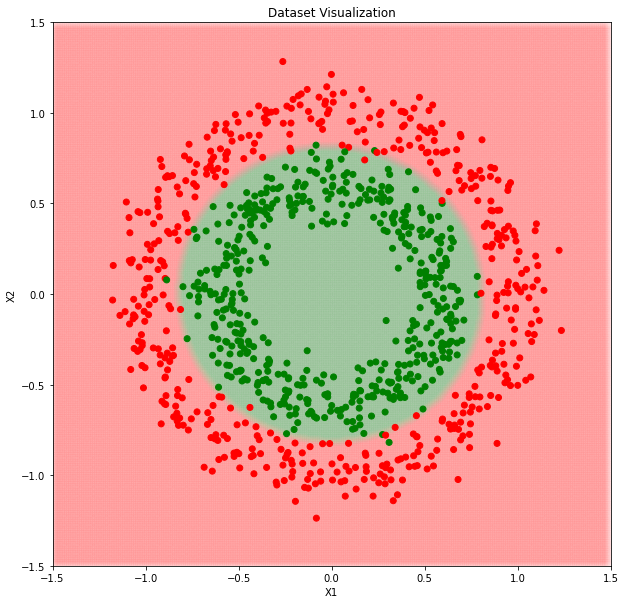

In [53]:
# Plotting decision boundary
xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
x_plot = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=[10,10])

cdict = {0: 'red', 1: 'green'}

y_plot = pd.Series(np.array(1*(1*(sigmoid(np.matrix(x_poly_plot)*w[1:] + w[0])>0.5))).T[0])

plt.scatter(x_plot[:,0], x_plot[:,1], c = y_plot.apply(lambda x: cdict[x]), s =100, alpha=0.01)
plt.title("Dataset Visualization")
plt.xlim(left=-1.5, right =1.5)
plt.ylim(bottom=-1.5, top =1.5)
plt.xlabel('X1')
plt.ylabel('X2')


plt.scatter(X['X1'],X['X2'], c = y.apply(lambda x: cdict[x]))
plt.title("Dataset Visualization")
plt.xlim(right=1.5)
plt.xlabel('X1')
plt.ylabel('X2')


plt.show()

We can clearly see that for this dataset, polynomial kernels will perform better since the data is not linearly separable

### SVM

In [65]:
df2.columns = ['X1','X2','y']
X = df2[['X1','X2']]
y = df2['y']

np.random.seed(10)
N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X.loc[order[:train_N],:]
y_train = y.loc[order[:train_N]]

X_test = X.loc[order[train_N:],:]
y_test = y.loc[order[train_N:]]

### SVM (Linear Kernel)

In [55]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_train_svm1 = svm_linear.predict(X_train)
y_test_svm1 = svm_linear.predict(X_test)

accuracy_train_svm1 = accuracy(y_train,y_train_svm1)
accuracy_test_svm1 = accuracy(y_test,y_test_svm1)
print('Training accuracy = {}'.format(accuracy_train_svm1))
print('Testing accuracy = {}'.format(accuracy_test_svm1))

Training accuracy = 0.61
Testing accuracy = 0.525


/home/achusanjeev/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


### SVM (Polynomial Kernel [Degree =2])

In [56]:
svm_poly = SVC(kernel='poly', degree=2)
svm_poly.fit(X_train,y_train)
y_train_svm2 = svm_poly.predict(X_train)
y_test_svm2 = svm_poly.predict(X_test)

accuracy_train_svm2 = accuracy(y_train,y_train_svm2)
accuracy_test_svm2 = accuracy(y_test,y_test_svm2)
print('Training accuracy = {}'.format(accuracy_train_svm2))
print('Testing accuracy = {}'.format(accuracy_test_svm2))

Training accuracy = 0.98375
Testing accuracy = 0.97


/home/achusanjeev/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/achusanjeev/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


### SVM (Polynomial Kernel [Degree =3])

In [57]:
svm_poly_3 = SVC(kernel='poly', degree=3)
svm_poly_3.fit(X_train,y_train)
y_train_svm3 = svm_poly_3.predict(X_train)
y_test_svm3 = svm_poly_3.predict(X_test)

accuracy_train_svm3 = accuracy(y_train,y_train_svm3)
accuracy_test_svm3 = accuracy(y_test,y_test_svm3)
print('Training accuracy = {}'.format(accuracy_train_svm3))
print('Testing accuracy = {}'.format(accuracy_test_svm3))

Training accuracy = 0.5475
Testing accuracy = 0.485


/home/achusanjeev/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/achusanjeev/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


### Plotting the decision boundaries of all the SVM Models

In [58]:
X_train_values = X_train.values
y_train_values = y_train.values
X_test_values = X_test.values
y_test_values = y_test.values

/home/achusanjeev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


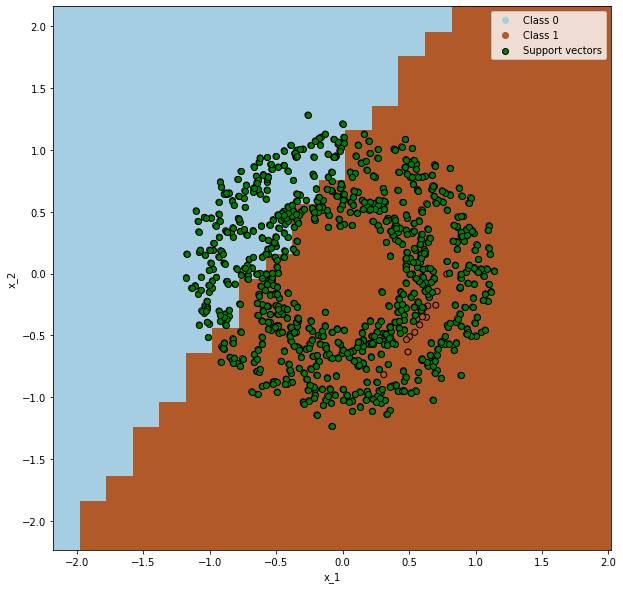

In [59]:
decision_region(X_train_values, y_train.values, svm_linear)

/home/achusanjeev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


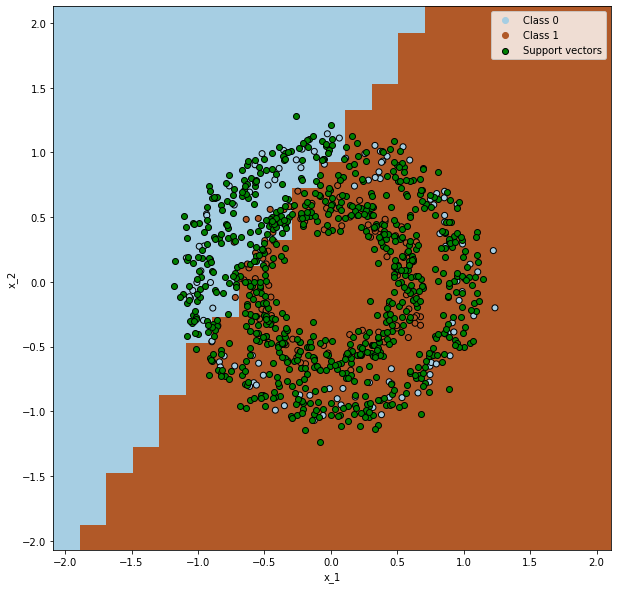

In [60]:
decision_region(X_test_values, y_test.values, svm_linear)

/home/achusanjeev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


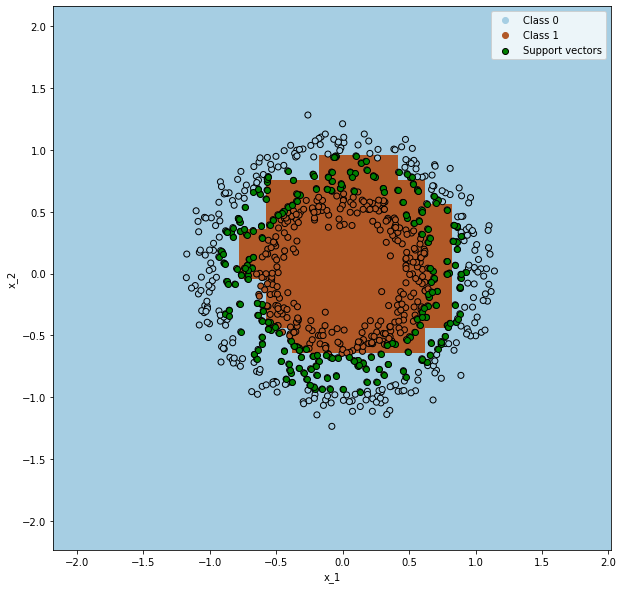

In [61]:
decision_region(X_train_values, y_train.values, svm_poly)

/home/achusanjeev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


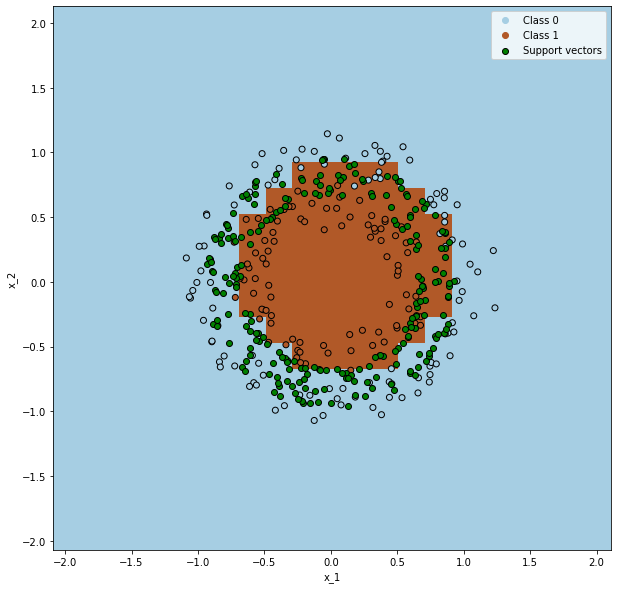

In [62]:
decision_region(X_test_values, y_test.values, svm_poly)

We can clearly see that for this dataset, polynomial kernels will perform better since the data is not linearly separable

### Tabulating the accuracy scores of all the models

In [63]:
Table = tabulate(
    [['Kernel Logistic Regression', 'Linear', accuracy_train1 ,accuracy_test1],
    ['', 'Polynomial', accuracy_train2 ,accuracy_test2],
    ['SVM ', 'Linear', accuracy_train_svm1 ,accuracy_test_svm1],
    ['', 'Polynomial', accuracy_train_svm2 ,accuracy_test_svm2]], 
    headers= ['Model', 'Kernel', 'Train Accuracy', 'Test Accuracy'], tablefmt='fancy_grid')                     

In [64]:
print(Table)

╒════════════════════════════╤════════════╤══════════════════╤═════════════════╕
│ Model                      │ Kernel     │   Train Accuracy │   Test Accuracy │
╞════════════════════════════╪════════════╪══════════════════╪═════════════════╡
│ Kernel Logistic Regression │ Linear     │          0.46875 │           0.43  │
├────────────────────────────┼────────────┼──────────────────┼─────────────────┤
│                            │ Polynomial │          0.98625 │           0.99  │
├────────────────────────────┼────────────┼──────────────────┼─────────────────┤
│ SVM                        │ Linear     │          0.61    │           0.525 │
├────────────────────────────┼────────────┼──────────────────┼─────────────────┤
│                            │ Polynomial │          0.98375 │           0.97  │
╘════════════════════════════╧════════════╧══════════════════╧═════════════════╛
